# Food Delivery Time Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Food_Delivery_Times.csv')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

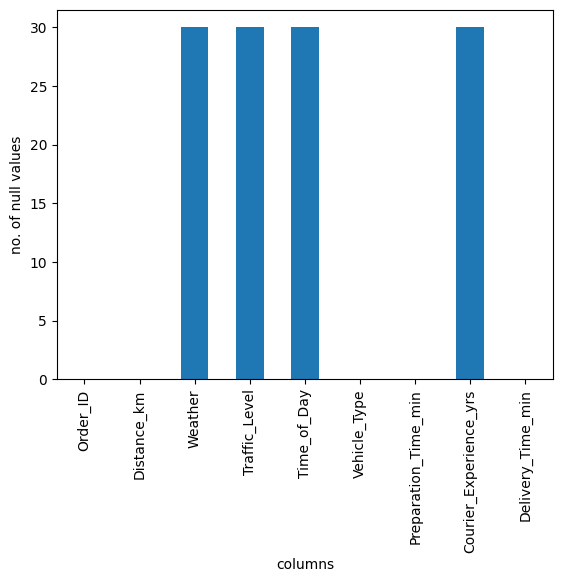

In [6]:
df.isnull().sum().plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('no. of null values')
plt.show()

In [7]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [8]:
columnList=df.columns

In [9]:
columnList=columnList.to_list()

In [10]:
columnList

['Order_ID',
 'Distance_km',
 'Weather',
 'Traffic_Level',
 'Time_of_Day',
 'Vehicle_Type',
 'Preparation_Time_min',
 'Courier_Experience_yrs',
 'Delivery_Time_min']

In [11]:
df['Weather'].isnull().sum()

30

In [12]:
df['Weather'].isnull().sum().item()

# The item() method converts the numpy.int64 type into a standard Python integer (int), which is just a regular number.

30

In [13]:
def nullValuecCount(list,df):
    xyz={}
    for i in list:
        if df[i].isnull().sum()>0 :
            xyz[i]=df[i].isnull().sum().item()
    return xyz


In [14]:
nullDict=nullValuecCount(columnList,df)

In [15]:
nullDict

# this is the dictionary of all column along with their null values

{'Weather': 30,
 'Traffic_Level': 30,
 'Time_of_Day': 30,
 'Courier_Experience_yrs': 30}

In [16]:
df.duplicated().sum().item()

# no duplicate items present in the dataset

0

In [17]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [19]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [20]:
df_numerical=df[['Distance_km','Preparation_Time_min','Courier_Experience_yrs','Delivery_Time_min']]

In [22]:
df_numerical.corr()['Delivery_Time_min']

Distance_km               0.780998
Preparation_Time_min      0.307350
Courier_Experience_yrs   -0.090433
Delivery_Time_min         1.000000
Name: Delivery_Time_min, dtype: float64

distance is highly correlated with delivery time and prepration time also affect delivery time ...
courier experience is -vely correlated with delivery time but very less...

<Axes: >

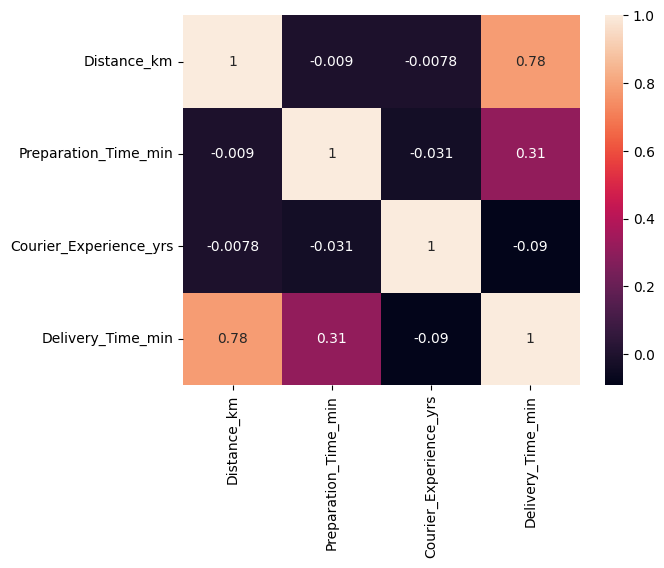

In [23]:
sns.heatmap(df_numerical.corr(),annot= True)

from the heatmap we found out that there is no multicollinwarity exist among input features.....

In [24]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [25]:
df['Distance_km'].value_counts()

Distance_km
12.85    5
17.61    4
19.41    4
4.14     3
13.60    3
        ..
1.23     1
1.62     1
6.05     1
10.14    1
6.63     1
Name: count, Length: 785, dtype: int64

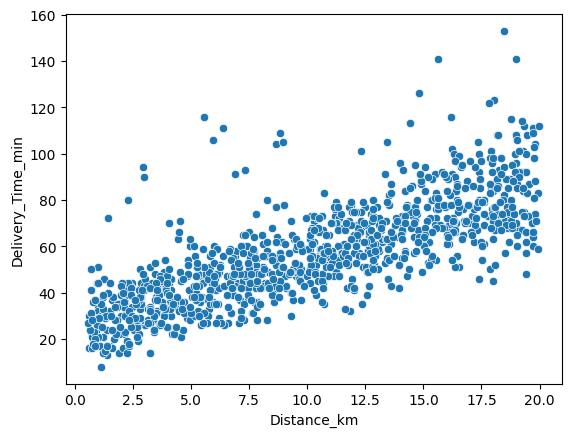

In [26]:
sns.scatterplot(x=df['Distance_km'],y=df['Delivery_Time_min'],data=df)
plt.show()

here distance is linear to delivery time  also it has outliers due to some others factors

In [27]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [28]:
df['Preparation_Time_min'].value_counts()

Preparation_Time_min
14    52
16    49
25    48
10    47
9     46
11    46
17    45
6     44
22    42
8     42
27    40
28    40
26    40
29    39
21    39
20    39
12    38
23    38
7     37
24    37
19    35
13    30
5     30
15    29
18    28
Name: count, dtype: int64

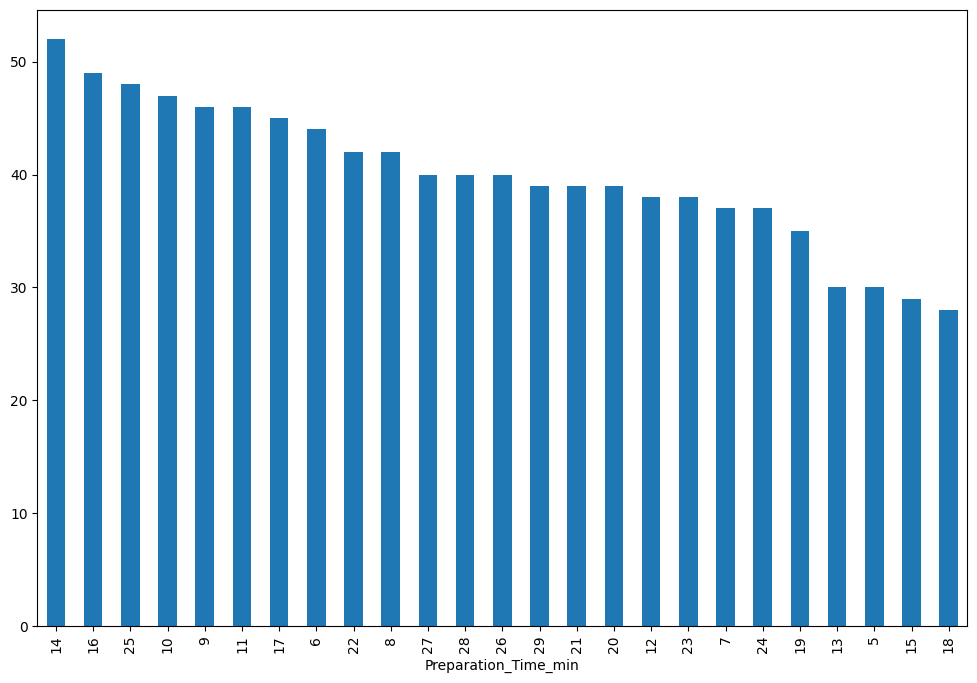

In [29]:
plt.figure(figsize=(12,8))
df['Preparation_Time_min'].value_counts().plot(kind='bar')
plt.show()

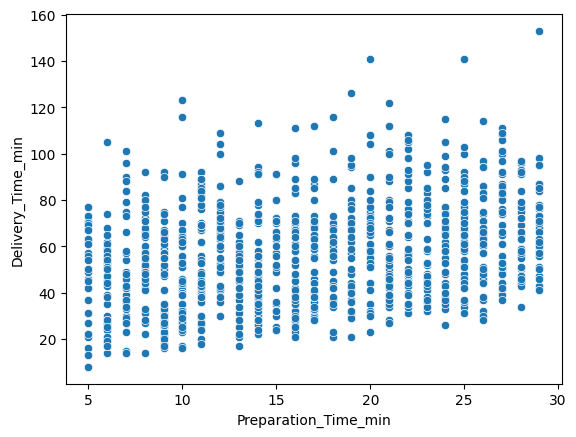

In [30]:
sns.scatterplot(x=df['Preparation_Time_min'],y=df['Delivery_Time_min'],data=df)
plt.show()

it show some linearity but variance is more here in the data

In [31]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [32]:
df['Courier_Experience_yrs'].value_counts()

Courier_Experience_yrs
6.0    109
9.0    108
1.0    107
8.0    101
2.0     99
4.0     94
7.0     91
0.0     91
5.0     90
3.0     80
Name: count, dtype: int64

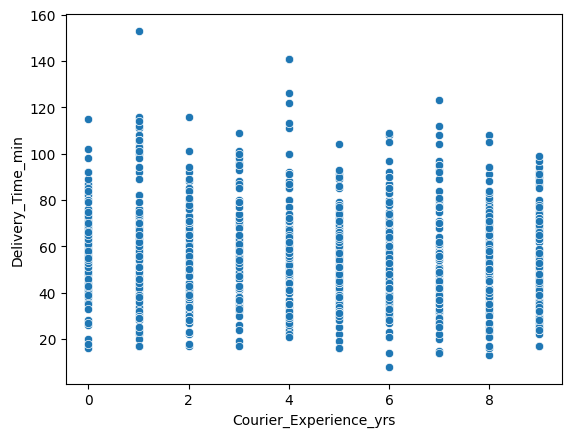

In [33]:
sns.scatterplot(x=df['Courier_Experience_yrs'],y=df['Delivery_Time_min'],data=df)
plt.show()

here variance in the data is too much with respect to courier experience vs delivery time

Median Imputation: If the variance is large and the data has outliers, you might want to replace missing values with the median rather than the mean. The median is more robust to outliers and can give a better representation of the central tendency in such cases.

In [34]:
df['Courier_Experience_yrs'].isnull().sum().item()

# this column has 30 null values

30

In [35]:
df['Courier_Experience_yrs'].median()

5.0

In [36]:
df['Courier_Experience_yrs']=df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [37]:
df['Courier_Experience_yrs'].median()

5.0

In [38]:
df['Courier_Experience_yrs'].isnull().sum().item()

0

here we have replaced all the null values of this column with me

In [39]:
nullDict

{'Weather': 30,
 'Traffic_Level': 30,
 'Time_of_Day': 30,
 'Courier_Experience_yrs': 30}

In [40]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [41]:
df['Weather'].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

<Axes: xlabel='Weather'>

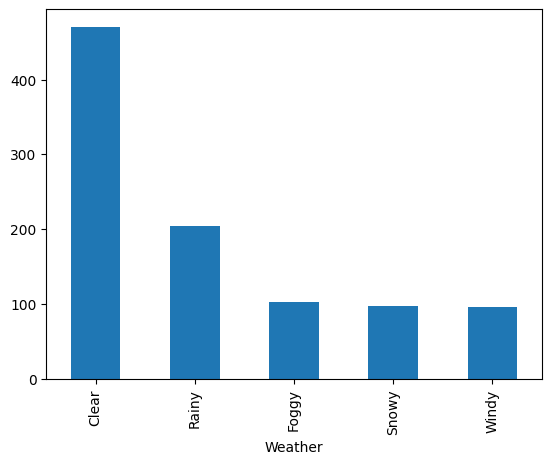

In [42]:
df['Weather'].value_counts().plot(kind='bar')

In [43]:
df['Weather'].isnull().sum().item()

30

In your case, the Weather column appears to be categorical data, with a few distinct categories (e.g., Clear, Rainy, Foggy, Snowy, and Windy). For categorical data like this, the most appropriate way to replace null values is to use the mode (the most frequent value) because it represents the most common category in the dataset.

In [45]:
mode_value = df['Weather'].mode()[0]  # mode() returns a series, so we take the first value


# Replace NaN values in the 'Weather' column with the mode value
df['Weather'].fillna(mode_value, inplace=True)

In [46]:
df['Weather'].isnull().sum().item()

0

now no null value sare present here

<Axes: xlabel='Weather', ylabel='Delivery_Time_min'>

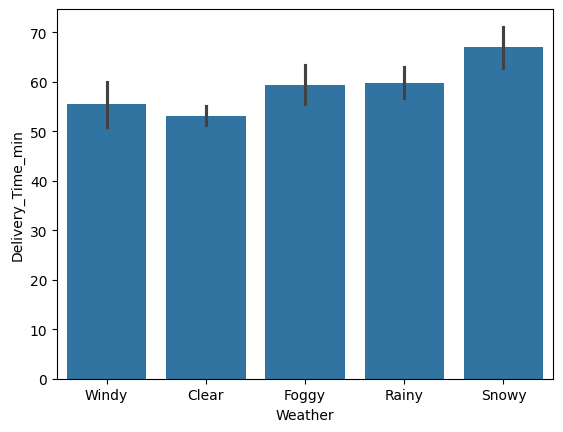

In [47]:
sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df)

from the graph we found that weather condition affect the delivery time 

In [48]:
df['Traffic_Level'].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

<Axes: xlabel='Traffic_Level'>

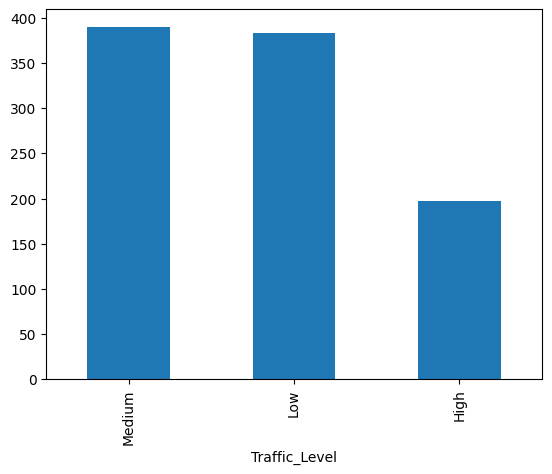

In [49]:
df['Traffic_Level'].value_counts().plot(kind='bar')

In [50]:
df['Traffic_Level'].isnull().sum().item()

30

In [51]:
# Find the mode (most frequent value) of the 'Traffic_Level' column
mode_value = df['Traffic_Level'].mode()[0]  # mode() returns a series, so we take the first value

# Replace NaN values in the 'Traffic_Level' column with the mode value
df['Traffic_Level'].fillna(mode_value, inplace=True)

C:\Users\amank\AppData\Local\Temp\ipykernel_4320\2603005837.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Level'].fillna(mode_value, inplace=True)


In [52]:
df['Traffic_Level'].isnull().sum().item()

0

<Axes: xlabel='Traffic_Level', ylabel='Delivery_Time_min'>

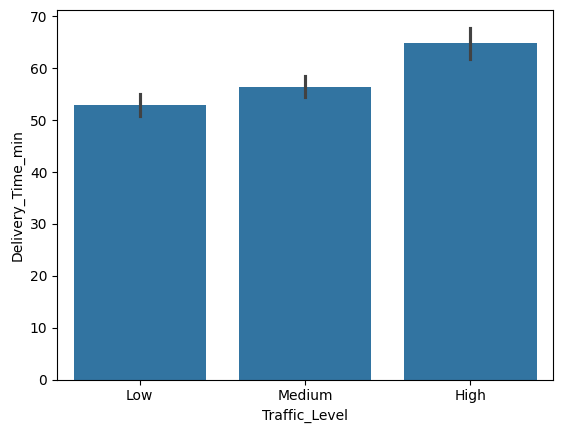

In [53]:
sns.barplot(x=df['Traffic_Level'],y=df['Delivery_Time_min'],data=df)

from the graph we found that trafic affect the delivery time ....high trafic leads to large delivery time

In [54]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                    0
Traffic_Level              0
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs     0
Delivery_Time_min          0
dtype: int64

In [55]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [56]:
df['Time_of_Day'].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

<Axes: xlabel='Time_of_Day'>

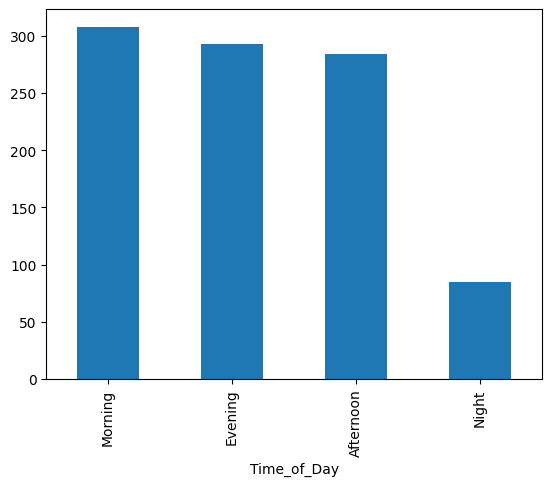

In [57]:
df['Time_of_Day'].value_counts().plot(kind='bar')

In [58]:
df['Time_of_Day'].isnull().sum().item()

30

In [59]:

mode_value = df['Time_of_Day'].mode()[0]  # mode() returns a series, so we take the first value

df['Time_of_Day'].fillna(mode_value, inplace=True)

C:\Users\amank\AppData\Local\Temp\ipykernel_4320\298147582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Day'].fillna(mode_value, inplace=True)


In [60]:
df['Time_of_Day'].isnull().sum().item()

0

we have replaced all nan values with mode of that column ......

<Axes: xlabel='Time_of_Day', ylabel='Delivery_Time_min'>

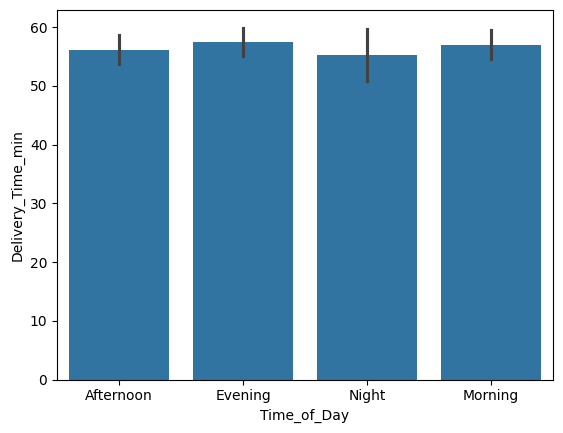

In [61]:
sns.barplot(x=df['Time_of_Day'],y=df['Delivery_Time_min'],data=df)

here all unique values of time we have almost similar delivery time means this column does not affect delivery time so we can remove that but we are going to take this

In [62]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

now no null values present in the data..

In [63]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

<Axes: xlabel='Vehicle_Type'>

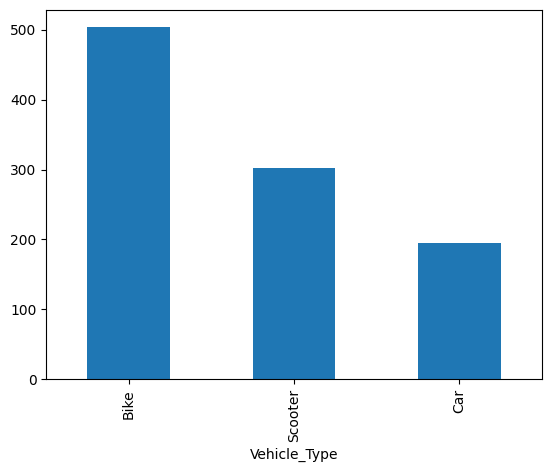

In [64]:
df['Vehicle_Type'].value_counts().plot(kind='bar')


most of the delivery take place using bike and then by scooter an at last by car

<Axes: xlabel='Vehicle_Type', ylabel='Delivery_Time_min'>

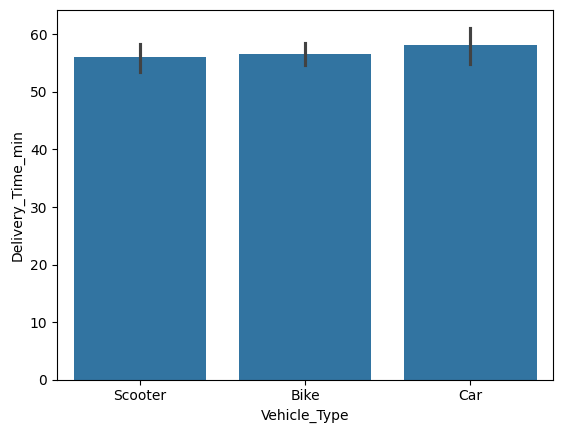

In [65]:
sns.barplot(x=df['Vehicle_Type'],y=df['Delivery_Time_min'],data=df)

from the graph we found that the there is very very slightly increase in delivery time from scooter to bike to Car 

In [66]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [67]:
df.to_csv('cleanedFoodDelivery.csv')

In [68]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [69]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [70]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

# creating the model

In [131]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [188]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

In [133]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [134]:
X=df[['Distance_km', 'Weather', 'Traffic_Level','Preparation_Time_min']]

y=df['Delivery_Time_min']

In [135]:
X

,Distance_km,Weather,Traffic_Level,Preparation_Time_min
0,7.93,Windy,Low,12
1,16.42,Clear,Medium,20
2,9.52,Foggy,Low,28
3,7.44,Rainy,Medium,5
4,19.03,Clear,Low,16
...,...,...,...,...
995,8.50,Clear,High,13
996,16.28,Rainy,Low,8
997,15.62,Snowy,High,26
998,14.17,Clear,Low,8


In [136]:
y

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

In [137]:
# we first apply train test split....
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [138]:
X_train.shape,y_train.shape 

((800, 4), (800,))

In [139]:
X_test.shape ,y_test.shape 

((200, 4), (200,))

In [140]:
X_train

,Distance_km,Weather,Traffic_Level,Preparation_Time_min
29,18.05,Clear,Medium,10
535,2.14,Clear,High,18
695,3.23,Clear,High,17
557,7.51,Rainy,Low,27
836,4.62,Rainy,Medium,8
...,...,...,...,...
106,17.59,Clear,Low,24
270,9.39,Clear,Low,14
860,16.38,Clear,Medium,6
435,16.73,Windy,High,9


In [193]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [201]:
categorical_cols = ['Weather', 'Traffic_Level']
numerical_cols = ['Distance_km', 'Preparation_Time_min']

In [202]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
        ('cat', OneHotEncoder(), categorical_cols),   # One-hot encoding for categorical column 
    ])

In [203]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),       # Apply preprocessing steps
    ('linear_model', LinearRegression())     # Fit linear regression model
])

# note ......No, it is not strictly necessary to use the steps= argument when constructing a pipeline in scikit-learn, but it is the recommended and standard way to define the pipeline components.

In [204]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Preparation_Time_min']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Weather',
                                                   'Traffic_Level'])])),
                ('linear_model', LinearRegression())])

In [205]:
y_pred = pipeline.predict(X_test)

In [206]:
y_pred

array([34.56041642, 64.57821657, 44.03181628, 42.21294289, 77.87840647,
       34.15824912, 68.80604416, 28.8160961 , 37.56326694, 78.30700539,
       75.81700816, 58.42268417, 39.61056767, 72.99916689, 88.1134447 ,
       82.87761542, 31.36663834, 71.14134212, 45.27719688, 59.97006297,
       82.53694479, 27.49837747, 79.90034559, 74.39101168, 60.01985407,
       36.30869329, 83.48705224, 27.13929163, 46.95272308, 64.63265046,
       67.30115809, 14.56709787, 59.89981479, 36.64531056, 64.59467766,
       19.71015351, 62.43534419, 53.16089286, 47.5912764 , 72.94195791,
       72.49118367, 32.00513246, 80.3193938 , 68.23592081, 38.77896855,
       16.45797739, 88.93806567, 82.34216092, 81.44270373, 29.31783958,
       64.17416664, 55.52001625, 37.14223982, 83.27767977, 57.7904473 ,
       55.02592127, 77.32551836, 81.30374015, 64.7746861 , 95.78635488,
       51.07158028, 36.80617501, 51.47109382, 50.1185633 , 55.12762884,
       65.37285635, 64.56469648, 89.87650751, 73.62341887, 56.76

In [207]:
print('r2_score : ',r2_score(y_test,y_pred))
print('mae : ',mean_absolute_error(y_test,y_pred))

r2_score :  0.8220029835877797
mae :  6.098381065656736


In [208]:
1-(((1-r2_score(y_test,y_pred))*(df.shape[0]-1))/(df.shape[0]-1-df.shape[1]-1))

0.8202032159799716

In [209]:
print("adjusted r2_score : ",1-(((1-r2_score(y_test,y_pred))*(df.shape[0]-1))/(df.shape[0]-1-df.shape[1]-1)))

adjusted r2_score :  0.8202032159799716


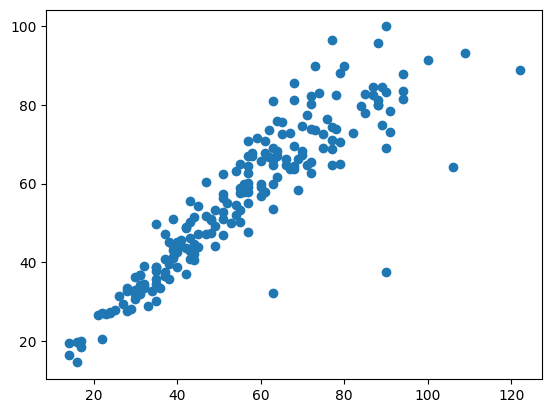

In [153]:
plt.scatter(y_test,y_pred)

here the graph between y_test and y_pred is linear but have some outliers means our model give good accuracy except in some case

In [154]:
residulas=y_test-y_pred

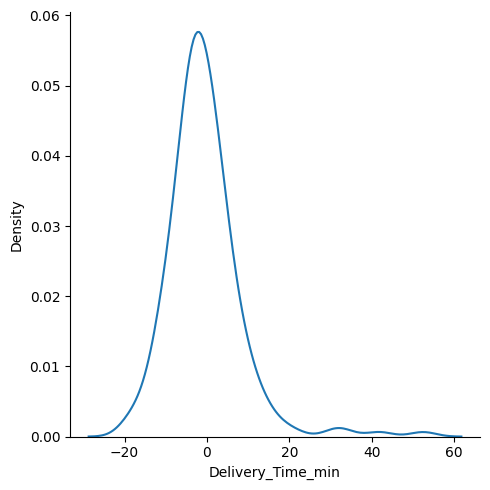

In [155]:
sns.displot(residulas,kind='kde')

here the graph of residulas is normal means our model performs well but here left skewed means the exist some outliers

In [156]:
df['Delivery_Time_min']

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

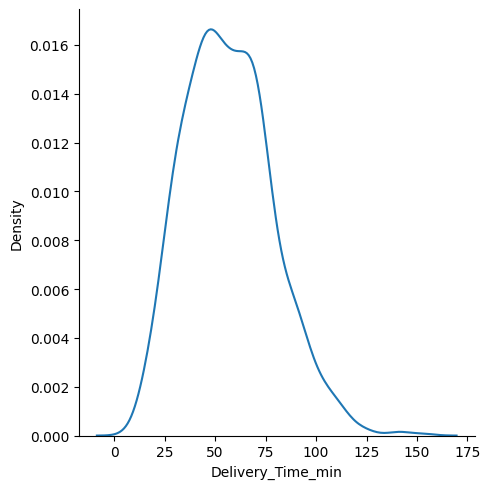

In [157]:
sns.displot(df['Delivery_Time_min'],kind='kde')

here output feature is also leftskewed to some extent


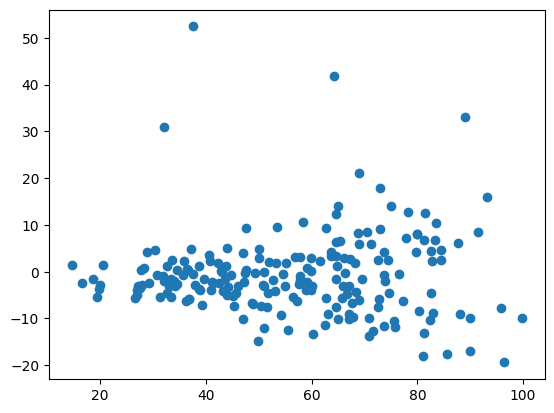

In [158]:
plt.scatter(y_pred,residulas)

here the graph between the residuals and y_pred is not much randomally distributed so our model does not that good

Applying Ridge reg

In [159]:
from sklearn.linear_model import Ridge

In [160]:
ridge_pipe=Pipeline([
    ('preprocessor', preprocessor),       
    ('linear_model', Ridge())
])

In [161]:
ridge_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Preparation_Time_min']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Weather',
                                                   'Traffic_Level'])])),
                ('linear_model', Ridge())])

In [162]:
y_predRidge=ridge_pipe.predict(X_test)

In [163]:
print('r2_score : ',r2_score(y_test,y_predRidge))
print('mae : ',mean_absolute_error(y_test,y_predRidge))

r2_score :  0.8218748706359822
mae :  6.1034459640156475


In [164]:
print("adjusted r2_score : ",1-(((1-r2_score(y_test,y_predRidge))*(df.shape[0]-1))/(df.shape[0]-1-df.shape[1]-1)))

adjusted r2_score :  0.8200738076494906


Applying Lasso reg

In [165]:
from sklearn.linear_model import Lasso,ElasticNet

In [166]:
lasso_pipe=Pipeline([
    ('preprocessor', preprocessor),       
    ('linear_model', Lasso())
])

In [167]:
lasso_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Preparation_Time_min']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Weather',
                                                   'Traffic_Level'])])),
                ('linear_model', Lasso())])

In [168]:
y_predLasso=lasso_pipe.predict(X_test)

In [169]:
print('r2_score : ',r2_score(y_test,y_predLasso))
print('mae : ',mean_absolute_error(y_test,y_predLasso))

r2_score :  0.7623539060482432
mae :  7.268921930081315


In [170]:
print("adjusted r2_score : ",1-(((1-r2_score(y_test,y_predLasso))*(df.shape[0]-1))/(df.shape[0]-1-df.shape[1]-1)))

adjusted r2_score :  0.759951013288367


Applying Elasticnet reg

In [171]:
elast_pipe=Pipeline([
    ('preprocessor', preprocessor),       
    ('linear_model', ElasticNet())
])

In [172]:
elast_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Preparation_Time_min']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Weather',
                                                   'Traffic_Level'])])),
                ('linear_model', ElasticNet())])

In [173]:
y_predElast=elast_pipe.predict(X_test)

In [109]:
print('r2_score : ',r2_score(y_test,y_predElast))
print('mae : ',mean_absolute_error(y_test,y_predElast))

r2_score :  0.6759418954769392
mae :  9.2396145574081


In [174]:
print("adjusted r2_score : ",1-(((1-r2_score(y_test,y_predElast))*(df.shape[0]-1))/(df.shape[0]-1-df.shape[1]-1)))

adjusted r2_score :  0.6684565298728993


In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
 


In [176]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(n_estimators=500,random_state=42,max_depth=None),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('models',model)  # Fit the model
        
    ])
    pipe.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Training set performance
    model_train_accuracy = pipe.score(X_train, y_train)  # Calculate Accuracy  
    model_train_f1 = r2_score(y_train, y_train_pred)  # Calculate F1-score
    model_train_precision = mean_absolute_error(y_train, y_train_pred)  # Calculate Precision
    model_train_recall = mean_squared_error(y_train, y_train_pred)  # Calculate Recall


    # Test set performance
    model_test_accuracy = pipe.score(X_test, y_test)  # Calculate Accuracy
    model_test_f1 = r2_score(y_test, y_test_pred)  # Calculate F1-score
    model_test_precision = mean_absolute_error(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = mean_squared_error(y_test, y_test_pred)  # Calculate Recall


    print(list(models.keys())[i])
    
    print('----------------------------------')
    print('Model performance for Train set')
    print('accuracy: {:.4f}'.format(model_train_accuracy))
    print('r2 score: {:.4f}'.format(model_train_f1))
    print('mae: {:.4f}'.format(model_train_precision))
    print('mse: {:.4f}'.format(model_train_recall))

    
    
    print('----------------------------------')
    print('Model performance for Test set')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('r2 score: {:.4f}'.format(model_test_f1))
    print('mae: {:.4f}'.format(model_test_precision))
    print('mse: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance for Train set
accuracy: 0.7540
r2 score: 0.7540
mae: 6.8655
mse: 121.9461
----------------------------------
Model performance for Test set
Accuracy: 0.8220
r2 score: 0.8220
mae: 6.0984
mse: 79.7831


Ridge Regression
----------------------------------
Model performance for Train set
accuracy: 0.7540
r2 score: 0.7540
mae: 6.8657
mse: 121.9461
----------------------------------
Model performance for Test set
Accuracy: 0.8220
r2 score: 0.8220
mae: 6.0989
mse: 79.7887


Lasso Regression
----------------------------------
Model performance for Train set
accuracy: 0.7201
r2 score: 0.7201
mae: 7.7341
mse: 138.7313
----------------------------------
Model performance for Test set
Accuracy: 0.7624
r2 score: 0.7624
mae: 7.2689
mse: 106.5194


Elastic Net
----------------------------------
Model performance for Train set
accuracy: 0.6316
r2 score: 0.6316
mae: 9.6759
mse: 182.6114
----------------------------------
Model perfo

In [123]:
# hyperparameter tuning.....for Random Forest Classifier
rf_params = {
    'n_estimators': [50, 100, 200,500,1000,1500],  # number of trees in the forest
    'max_depth': [None, 10, 20,5,15],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10,15],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # minimum number of samples required to be at a leaf node
    # 'max_features': ['auto', 'sqrt', 'log2']  # number of features to consider when looking for the best split
}

In [124]:
randomcv_models=[
    ('rf', RandomForestRegressor(), rf_params)  # adding the Random Forest Classifier with its parameters for hyperparameter tuning
]

In [126]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name, model, params in randomcv_models:
    random_search = RandomizedSearchCV(model, params, n_iter=100, cv=3, verbose=2, n_jobs=-1)  # performing randomized search with cross-validation
    pipe123=Pipeline([
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('model', random_search)  # Fit the model with RandomizedSearchCV
    ]) 
    pipe123.fit(X_train, y_train)  # Train the model with the training data
    model_params[name] = random_search.best_params_  # storing the best parameters for the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [127]:
print(model_params) 

{'rf': {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}}


In [177]:
models={
    
    'Random Forest': RandomForestRegressor(n_estimators=200,min_samples_split=10,max_depth=20,min_samples_leaf=4)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    pipe = Pipeline([
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('models',model)  # Fit the model
        
    ])
    pipe.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Training set performance
    model_train_accuracy = pipe.score(X_train, y_train)  # Calculate Accuracy  
    model_train_f1 = r2_score(y_train, y_train_pred)  # Calculate F1-score
    model_train_precision = mean_absolute_error(y_train, y_train_pred)  # Calculate Precision
    model_train_recall = mean_squared_error(y_train, y_train_pred)  # Calculate Recall


    # Test set performance
    model_test_accuracy = pipe.score(X_test, y_test)  # Calculate Accuracy
    model_test_f1 = r2_score(y_test, y_test_pred)  # Calculate F1-score
    model_test_precision = mean_absolute_error(y_test, y_test_pred)  # Calculate Precision
    model_test_recall = mean_squared_error(y_test, y_test_pred)  # Calculate Recall


    print(list(models.keys())[i])
    
    print('----------------------------------')
    print('Model performance for Train set')
    print('accuracy: {:.4f}'.format(model_train_accuracy))
    print('r2 score: {:.4f}'.format(model_train_f1))
    print('mae: {:.4f}'.format(model_train_precision))
    print('mse: {:.4f}'.format(model_train_recall))

    
    
    print('----------------------------------')
    print('Model performance for Test set')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('r2 score: {:.4f}'.format(model_test_f1))
    print('mae: {:.4f}'.format(model_test_precision))
    print('mse: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
----------------------------------
Model performance for Train set
accuracy: 0.8352
r2 score: 0.8352
mae: 5.6806
mse: 81.6793
----------------------------------
Model performance for Test set
Accuracy: 0.7889
r2 score: 0.7889
mae: 6.8384
mse: 94.6327




from all above we have found that linear reg perform better an then ridge an other produces less accuracy

In [111]:
df.iloc[123]

Order_ID                      261
Distance_km                 12.49
Weather                     Clear
Traffic_Level              Medium
Time_of_Day               Morning
Vehicle_Type                 Bike
Preparation_Time_min           25
Courier_Experience_yrs        4.0
Delivery_Time_min              77
Name: 123, dtype: object

In [112]:
df['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning'], dtype=object)

In [210]:
columns = ['Distance_km', 'Weather', 'Traffic_Level','Preparation_Time_min']

# Create a DataFrame for the new input
new_input = np.array([19.3, 'Clear','Low',16]).reshape(1, -1)
new_input_df = pd.DataFrame(new_input, columns=columns)

In [211]:
new_input_df

,Distance_km,Weather,Traffic_Level,Preparation_Time_min
0,19.3,Clear,Low,16


In [212]:
pipeline.predict(new_input_df)

array([76.53407168])

In [181]:
X_train.head(2)                                     

,Distance_km,Weather,Traffic_Level,Preparation_Time_min
29,18.05,Clear,Medium,10
535,2.14,Clear,High,18


In [184]:
X,y

(     Distance_km Weather Traffic_Level  Preparation_Time_min
 0           7.93   Windy           Low                    12
 1          16.42   Clear        Medium                    20
 2           9.52   Foggy           Low                    28
 3           7.44   Rainy        Medium                     5
 4          19.03   Clear           Low                    16
 ..           ...     ...           ...                   ...
 995         8.50   Clear          High                    13
 996        16.28   Rainy           Low                     8
 997        15.62   Snowy          High                    26
 998        14.17   Clear           Low                     8
 999         6.63   Foggy           Low                    24
 
 [1000 rows x 4 columns],
 0      43
 1      84
 2      59
 3      37
 4      68
        ..
 995    54
 996    71
 997    81
 998    55
 999    58
 Name: Delivery_Time_min, Length: 1000, dtype: int64)

In [214]:
import pickle

In [215]:
# using the trained pipeline to make predictions on new data
pickle.dump(pipeline, open('food_delivery_model.pkl', 'wb'))